In [24]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#使图像变得更好

%config InlineBackend.figure_format = 'svg'
#SVG格式的图形更清晰易读

plt.rcParams['figure.figsize']=8,5
plt.rcParams['image.cmap']='viridis'
import pandas as pd
#增加默认打印尺寸并设置颜色方案

In [25]:
df = pd.read_csv('video_games_sales.csv').dropna()
#print(df.shape)
df.shape


(6825, 16)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [27]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')
#转换数据类型

In [28]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()
#显示所需要的列

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii             2006    Sports         82.53   
2         Mario Kart Wii      Wii             2008    Racing         35.52   
3      Wii Sports Resort      Wii             2009    Sports         32.77   
6  New Super Mario Bros.       DS             2006  Platform         29.80   
7               Wii Play      Wii             2006      Misc         28.92   

   Critic_Score  Critic_Count  User_Score  User_Count Rating  
0          76.0            51         8.0         322      E  
2          82.0            73         8.3         709      E  
3          80.0            73         8.0         192      E  
6          89.0            65         8.5         431      E  
7          58.0            41         6.6         129      E

#### 根据国家和年份创建视频游戏销售情节。首先，让我们只保留我们需要的列。然后，我们将按年计算总销售额，并在生成的DataFrame上调用plot（）方法。

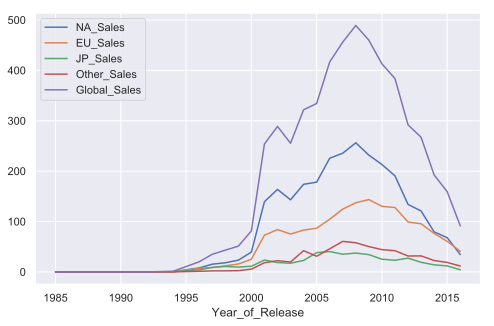

In [29]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot()

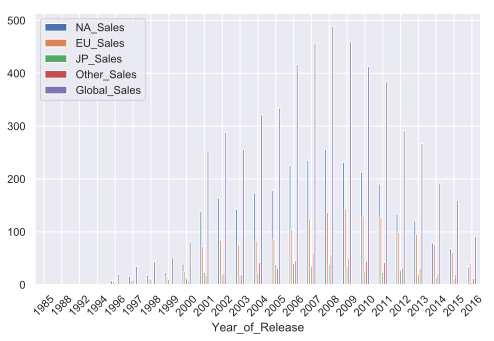

In [30]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45)
# 使用kind参数灵活的改变视图例型

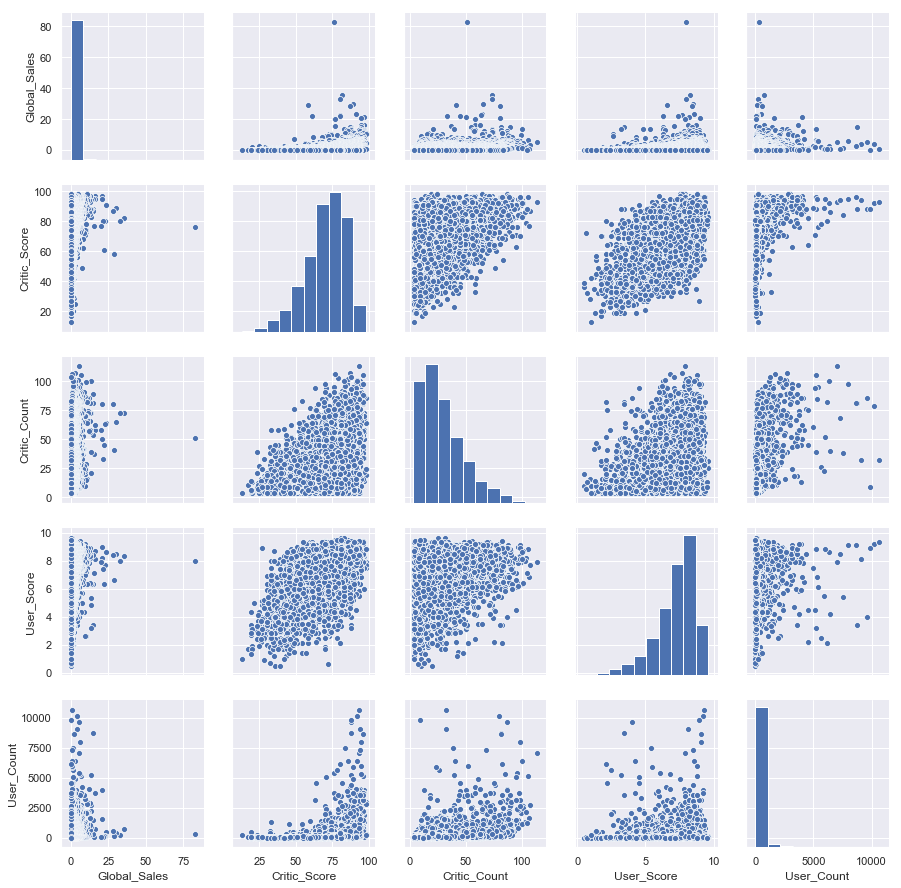

In [31]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']])

#### 看一下这些复杂图中的第一个图，即成对关系图，它默认创建一个散点图矩阵。这种情节有助于我们在单个输出中可视化不同变量之间的关系。分布直方图位于矩阵的对角线上。其余图表是相应功能对的散点图。


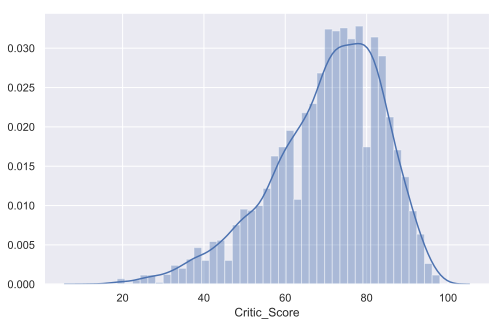

In [32]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df['Critic_Score'])

#### 也可以用seaborn的distplot（）绘制观测分布。例如，看看评论家评级的分布：Critic_Score。默认情况下，图表显示直方图和核密度估计值。

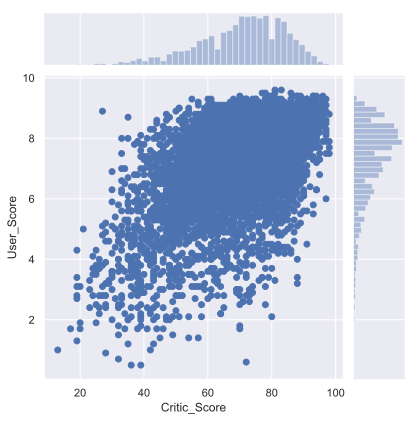

In [33]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter')

#### 为了更仔细地观察两个数值变量之间的关系，可以使用关节图，它是散点图和直方图之间的交叉。我们来看看Critic_Score和User_Score功能是如何相关的。

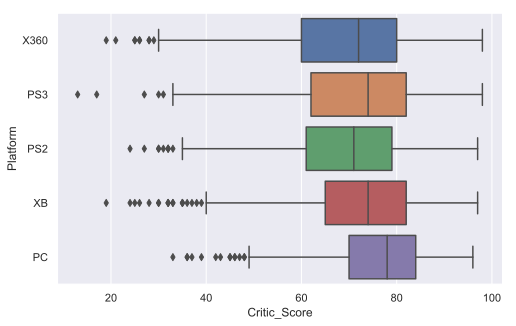

In [34]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df['Platform'].isin(top_platforms)], orient="h")
#比较评论家对前五大游戏平台的评分。

#### 分布的四分位数;其长度由25％（Q1）25％（Q1）和75％（Q3）75％（Q3）百分位数决定。框内的垂直线标出分布的中位数（50％50％）。胡须是从盒子延伸出来的线条。它们代表数据点的整个分散，特别是落在区间内的点（Q1-1.5⋅IQR，Q3 +1.5⋅IQR），其中IQR = Q3-Q1是四分位数范围。超出由胡须限定的范围的异常值被单独绘制。

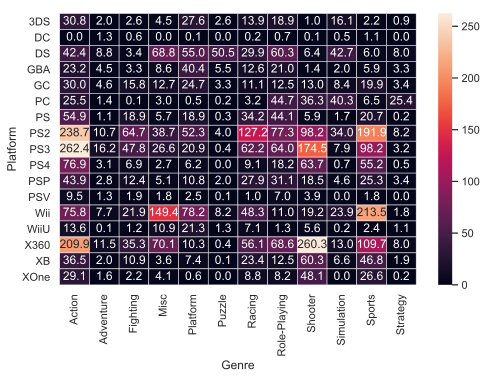

In [35]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)
#最后一种是热图。热图允许您查看两个分类变量的数值变量的分布。让我们通过流派和游戏平台可视化游戏的总销售额。

In [36]:
#### Plotly是一个开源库，允许在Jupyter笔记本中创建交互式绘图，而无需使用Javascript。
####交互式绘图的真正美妙之处在于它们为详细的数据探索提供了用户界面。例如，可以通过鼠标悬停点，从可视化隐藏不感兴趣的系列，放大到绘图的特定部分等来查看精确的数值。

In [37]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [38]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']
# 建立一个线图，显示每年发布的游戏数量和销售额

In [39]:
# 为全局销售创建一条线（跟踪）
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Global Sales'
)

# 为发布的游戏数量创建一条线（跟踪）
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Number of games released'
)

# 定义数据数组
data = [trace0, trace1]

# 设置标题
layout = {'title': 'Statistics for video games'}

# 创建一个图并绘制它
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)
# show_link参数切换通向图表中在线平台plot.ly的链接的可见性。大多数情况下，不需要此功能，因此通过传递show_link = False将其关闭，
#以防止意外点击这些链接。

In [40]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)
#将绘图保存在html文件中

'file://E:\\400 Jupyter\\4 python 数据分析\\8 Kaggle练习\\years_stats.html'

In [41]:
# 进行计算并准备数据集
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

#使用条形图来比较不同游戏平台的市场份额，按照新版本的数量和总收入进行细分

In [42]:
# 全球销售创建一个栏
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Global_Sales'],
    name='Global Sales'
)

# 为发布的游戏数量创建一个栏
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Number_of_Games'],
    name='Number of games released'
)

# 将数据和样式对象放在一起
data = [trace0, trace1]
layout = {'title': 'Market share by gaming platform'}


fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [43]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )
    
# Visualize
iplot(data, show_link=False)
#游戏类型对评论家评分的分布

#### 使用plotly，您还可以创建其他类型的可视化。即使使用默认设置，这些图也非常好看。此外，该库可以轻松修改各种参数：颜色，字体，标题，注释等。